    Day  Home (volts)
0     1         124.2
1     2         124.6
2     3         124.5
3     4         124.7
4     5         124.8
5     6         124.0
6     7         124.4
7     8         124.2
8     9         124.4
9    10         124.6
10   11         124.4
11   12         124.0
12   13         124.4
13   14         124.3
14   15         124.7
15   16         124.6
16   17         124.1
17   18         124.2
18   19         124.5
19   20         124.9
20   21         124.6
21   22         124.4
22   23         124.3
23   24         124.2
24   25         124.5


<AxesSubplot:>

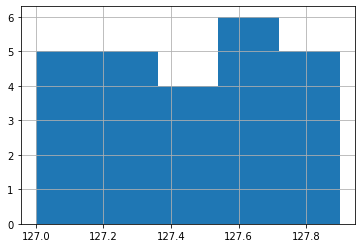

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median, mode, stdev

voltages = pd.read_csv('2.1_home_voltages.csv')

print(tips2)

voltages['Home (volts)'].hist(bins=5)

total number of ages: 45
[42, 43, 46, 46, 47, 47, 48, 49, 49, 50, 51, 51, 51, 51, 51, 52, 52, 54, 54, 54, 54, 54, 55, 55, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 60, 61, 61, 61, 62, 64, 64, 65, 68, 69, 70]
midpoint: 69.0


Frequencies
from 42 to 46
[46, 42, 43, 46]
4
freq %: 8.89%
cumulative freq %: 8.89%

from 47 to 51
[51, 49, 50, 48, 49, 51, 47, 51, 51, 51, 47]
11
freq %: 24.44%
cumulative freq %: 33.33%

from 52 to 56
[54, 52, 56, 54, 55, 55, 54, 56, 55, 54, 55, 56, 52, 54]
14
freq %: 31.11%
cumulative freq %: 64.44%

from 57 to 61
[57, 61, 57, 57, 58, 57, 61, 60, 61]
9
freq %: 20.00%
cumulative freq %: 84.44%

from 62 to 66
[64, 65, 62, 64]
4
freq %: 8.89%
cumulative freq %: 93.33%

from 67 to 71
[68, 69, 70]
3
freq %: 6.67%
cumulative freq %: 100.00%

median age: 55


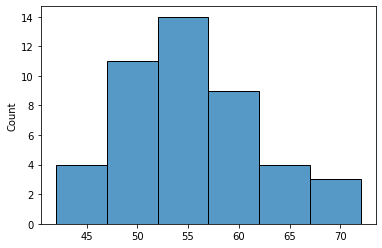

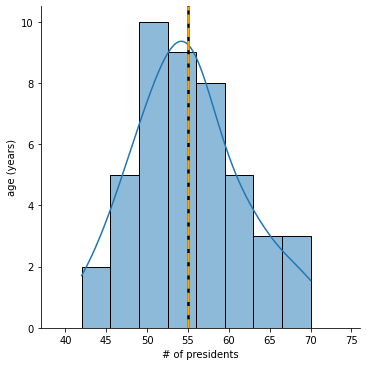

In [9]:
ages = [57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50,
        48, 65, 52, 56, 46, 54, 49, 51, 47, 55, 55, 54, 42,
        51, 56, 55, 51, 54, 51, 60, 62, 43, 55, 56, 61, 52,
        69, 64, 46, 54, 47, 70]

print('total number of ages: '+str(len(ages)))
print(sorted(ages))

def class_filter(min, max):
    def the_filter(age):
        return age >= min and age <= max
    return the_filter

classes = [
    [42, 46],
    [47, 51],
    [52, 56],
    [57, 61],
    [62, 66],
    [67, 71]
]
def ages_in_class(limits):
    return list(filter(class_filter(limits[0], limits[1]), ages))
last_ages = ages_in_class(classes[5])
def midpoint_from_limits(limits):
    return sum(limits)/2
last_midpoint = midpoint_from_limits(classes[5])

print(f'midpoint: {last_midpoint}')

print('\n\nFrequencies')
cum_freq = 0
for limits in classes:
    min_age, max_age = limits
    class_ages = ages_in_class(limits)
    print('from %s to %s' % (min_age, max_age))
    print(class_ages)
    print(len(class_ages))
    class_freq = 100*len(class_ages)/len(ages)
    cum_freq += class_freq
    print(f'freq %: {class_freq:.2f}%')
    print(f'cumulative freq %: {cum_freq:.2f}%')
    print('')

fig, ax = plt.subplots()

sns.histplot(ages, binwidth=5, ax=ax)
g2 = sns.displot(ages, kde=True)
age_median = median(ages)
print(f'median age: {age_median}')

def age_specs(**kwargs):
    age_mean = mean(ages)
    age_median = median(ages)
    plt.axvline(age_mean, c='k', ls='-', lw=2.5, label=f'mean {age_mean:.2f}')
    plt.axvline(age_median, c='orange', ls='--', lw=2.5, label=f'median {age_median:.2f}')

g2.map(age_specs)

g2 = (g2.set_axis_labels("# of presidents","age (years)").set(xlim=(37,76)))
plt.show(g2)